#### Images Importing 
##### We will use some standard test images 

In [1]:
from PIL import Image  

from pathlib import Path 

In [2]:
# fetching data 
IMGS = Path('./data')

#### Image Manipulation 

##### Computer see images as 3D Matrix also known as Tensors. Color images are reprsentted as three colors i.e RGB (Red, Green, Blue) also called channels. An image is a stack of three channels of a matrices. Each pixel can be identified by thr row , columnn and the combination of three channel of colur we perceived for that images. 

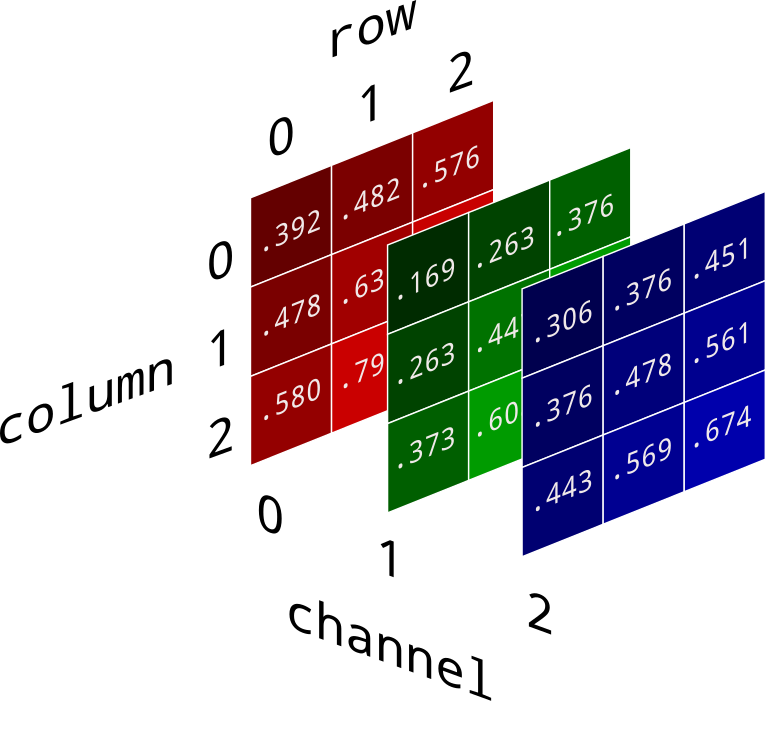

In [3]:
img = Image.open(str(IMGS / 'tulips.png'))  # Here we are storing a pathlib argument so we have to store string for pathlib 

In [6]:
# img object has several properties 

img.format, img.size, img.mode

('PNG', (768, 512), 'RGB')

In [8]:
img.info.keys()

dict_keys(['gamma', 'chromaticity', 'dpi'])

In [9]:
img.info['dpi']

(72.009, 72.009)

In [10]:
# Display of an image 

img.show()

In [11]:
# Rotating an image 

img.rotate(45).show()

In [14]:
with Image.open(str(IMGS / 'tulips.png')) as img: 
    box = (200, 100, 500, 300)
    region = img.crop(box)
    region.show()
    region.transpose(Image.FLIP_LEFT_RIGHT).show()

#### Computer Vision 

In [16]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

#### BGR vs RGB 

In [19]:
# The image is stored in BGR 

tulips = cv.imread(str(IMGS / 'tulips.png'))

In [22]:
# OpenCV2 expects BGR channels 

cv.imshow('Tulips', tulips)
cv.waitKey(0)
cv.destroyAllWindows()

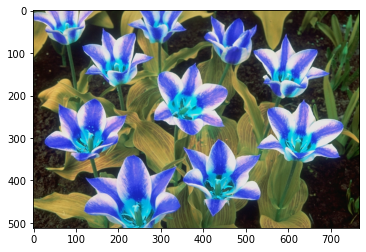

In [23]:
# matplot expects RGB but finds BGR i.e blue color 
plt.imshow(tulips)
plt.show()

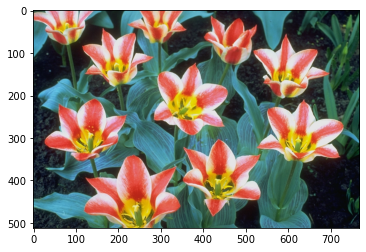

In [24]:
tulips = cv.cvtColor(tulips, cv.COLOR_BGR2RGB)


plt.imshow(tulips)
plt.show()

#### Basic Operations 

In [25]:
# Some RGB colors 

BLACK = [0,0,0]
GRAY = [128, 128, 128]
WHITE = [255, 255, 255]
RED = [255, 0, 0]
GREEN = [0, 255, 0]
BLUE = [0, 0, 255]
YELLOW = [255, 255, 0]
MAGENTA = [255, 0, 255]
CYAN = [0, 255, 255]

In [27]:
# Create a black image 

img = np.zeros((512, 512, 3), np.uint8)

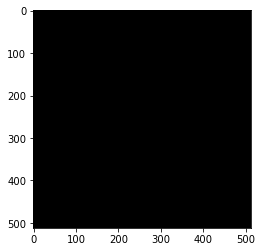

In [29]:
plt.imshow(img, cmap='gray')
plt.show()

In [30]:
# From numpy array we can retrieve shape 

img.shape 

(512, 512, 3)

In [31]:
# Numpy library is for fast array calculations, so simply accessing each and every pixel value and modifying it will be very slow.

img[100:150, 100:150] = WHITE 
img[150:250, 150:250] = BLUE 

In [32]:
def plot_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

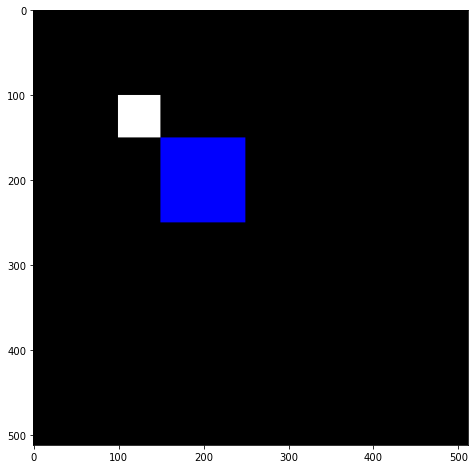

In [33]:
plot_img(img)

In [34]:
# Accessing the red value 

img.item(200, 200, 0) 

0

In [35]:
# Modifying RED value 

img.itemset((200, 200, 0), 255)

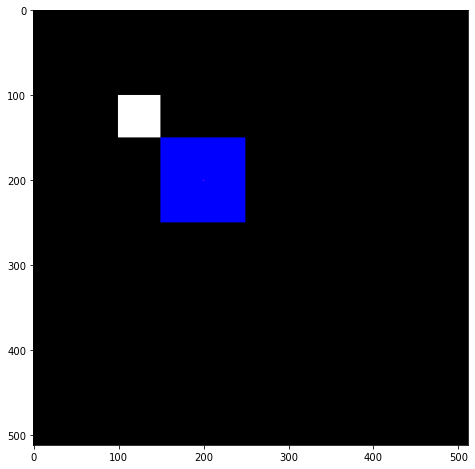

In [36]:
plot_img(img)

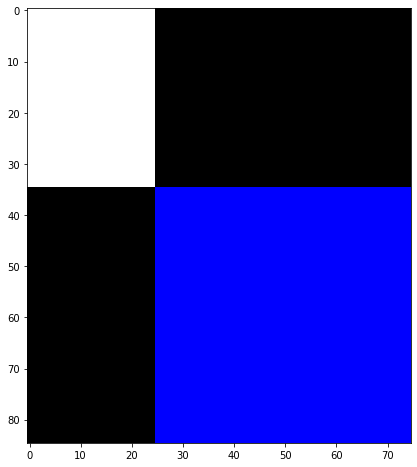

In [37]:
sect = img[115:200, 125:200]
plot_img(sect)

In [38]:
sect = img[115:200, 125:200]
img[290:375, 300:375] = sect

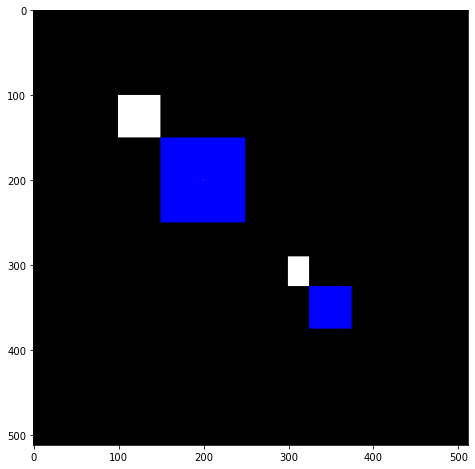

In [39]:
plot_img(img)

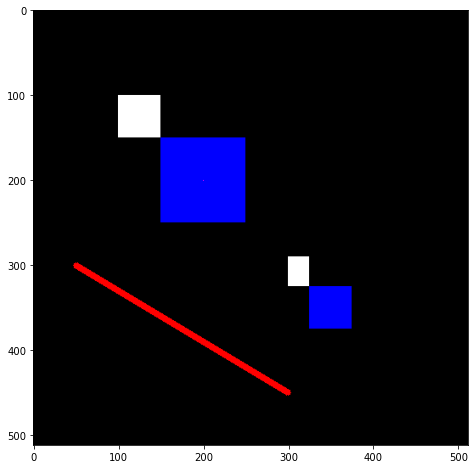

In [40]:
# Draw a diagonal red line with thickness of 5 pixel 

img = cv.line(img, (50, 300), (300, 450), RED, 5)
plot_img(img)

In [44]:
img = cv.rectangle(img, (280, 280), (440, 440), GREEN, 5)
img = cv.circle(img, (430, 80), 63, YELLOW, -1)

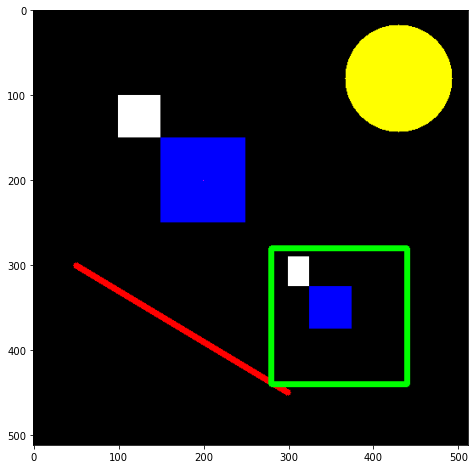

In [45]:
plot_img(img)

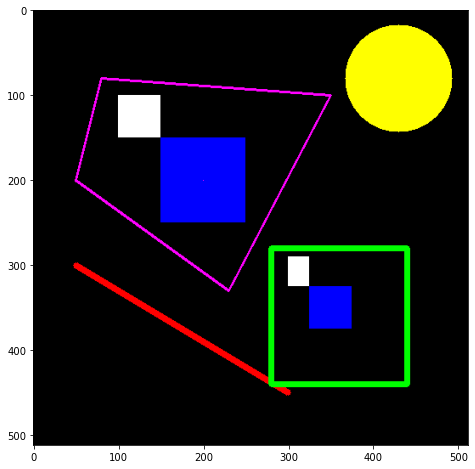

In [47]:
pts = np.array([[80, 80], [350, 100], [230, 330], [50, 200]], np.int32)
img = cv.polylines(img, [pts], True, MAGENTA, 2)
plot_img(img)

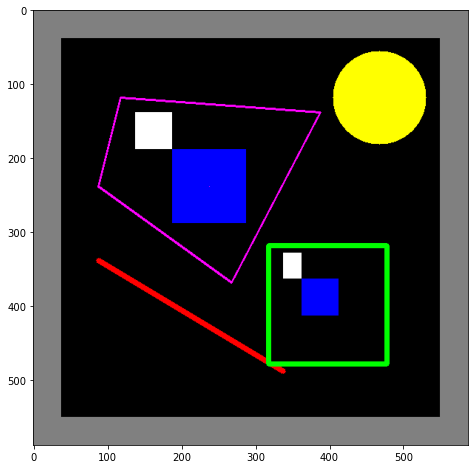

In [48]:
img = cv.copyMakeBorder(img, 38, 38, 38, 38, cv.BORDER_CONSTANT, value=GRAY)
plot_img(img)

#### Image Blending 

In [49]:
tulips.shape

(512, 768, 3)

In [52]:
# Create a black image 

circle = np.zeros(tulips.shape, np.uint8)
circle = cv.circle(circle, (365, 215), 100, YELLOW, -1)

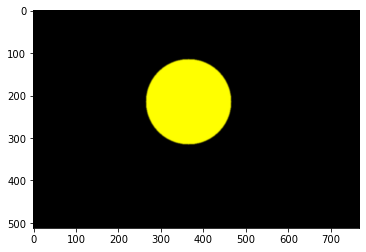

In [53]:
plt.imshow(circle, cmap='gray', interpolation='bicubic')
plt.show()

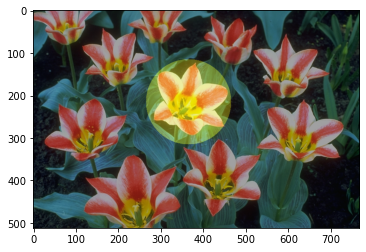

In [54]:
img = cv.addWeighted(tulips, 0.7, circle, 0.3, 0)
plt.imshow(img, cmap='gray')
plt.show()

#### Image Thresholding 

In [56]:
peppers = cv.imread(str(IMGS / 'peppers.png'))
peppers = cv.cvtColor(peppers, cv.COLOR_BGR2RGB)

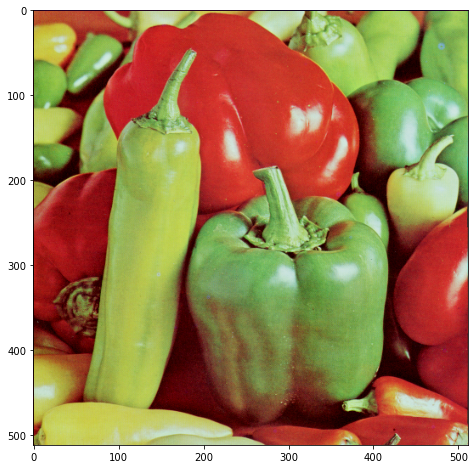

In [57]:
plot_img(peppers)

#### Simple Thresholding 

In [64]:
# Transform RGB to GRAY 

peppers2gray = cv.cvtColor(peppers, cv.COLOR_RGB2GRAY)
_, mask = cv.threshold(peppers2gray, thresh=150, maxval=255, type=cv.THRESH_BINARY)

filtered_peppers = cv.bitwise_and(peppers, peppers, mask=mask)

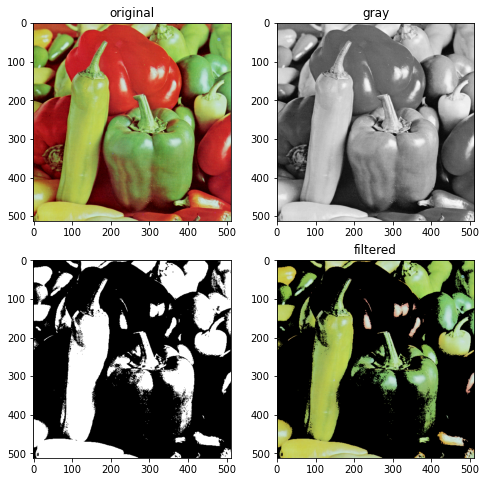

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].imshow(peppers, cmap='gray')
axs[0, 0].set_title('original')

axs[0, 1].imshow(peppers2gray, cmap='gray')
axs[0, 1].set_title('gray')

axs[1, 0].imshow(mask, cmap='gray')
axs[1, 1].set_title('filtered')

axs[1, 1].imshow(filtered_peppers, cmap='gray')
axs[1, 1].set_title('filtered')


plt.show()

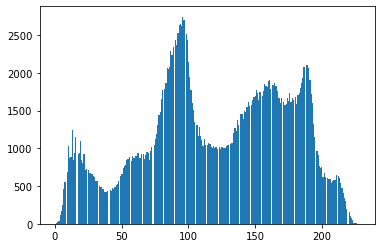

In [67]:
# ravel() fliattens the 3D array 

plt.hist(peppers2gray.ravel(), 256)
plt.show()

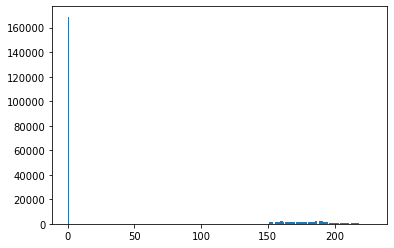

In [68]:
# Lot of pixels taken value to zero, actually converting filtered_peppers to gray 

plt.hist(cv.cvtColor(filtered_peppers, cv.COLOR_RGB2GRAY).ravel(), 256)
plt.show()

#### Another type of thresholding operations could be: "HSV thresholding"

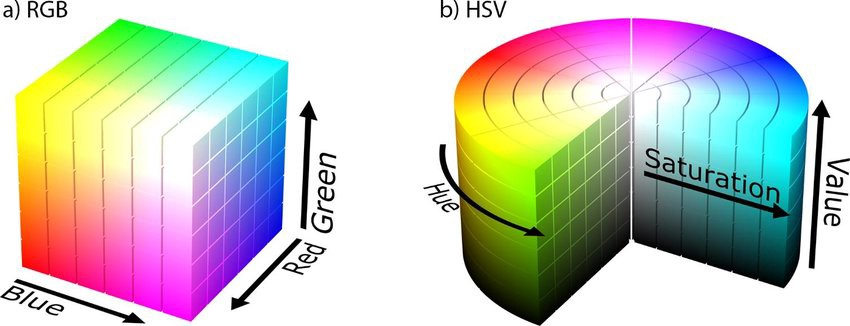

In [77]:
# Convert RGB to HSV 

peppers_hsv = cv.cvtColor(peppers, cv.COLOR_RGB2HSV)

# Define range of red color in HSV 

light_green = np.array([30, 110, 160])
dark_green = np.array([45, 180, 230])

# Threshold the HSV image to get only red colors 
# openCv uses H: 0-179, S:0-255, V:0-255
# gimp uses H = 0-360, S = 0-100 and v = 0-100 

mask = cv.inRange(peppers_hsv, light_green, dark_green)


# Bitwise - AND mask and original image 

res = cv.bitwise_and(peppers, peppers, mask=mask)

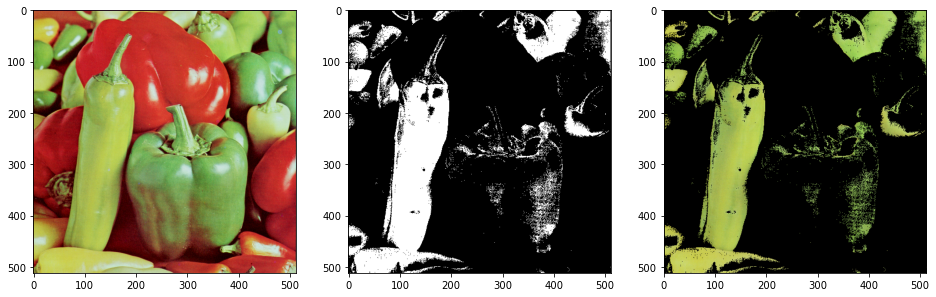

In [78]:
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(16, 8))
axs[0].imshow(peppers, cmap='gray')
axs[1].imshow(mask, cmap='gray')
axs[2].imshow(res, cmap='gray')
plt.show()

#### Find contours 

In [79]:
peppers2gray = cv.cvtColor(peppers, cv.COLOR_RGB2GRAY)
_, mask = cv.threshold(peppers2gray, thresh=120, maxval=255, type=cv.THRESH_BINARY)

In [80]:
# arguments in cv.findContours() function, first one is source image
# second is contour retrieval mode, third is contour approximation method 

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [82]:
# As per documentation source image is altered when using findContours 

peppers_contours = peppers.copy()
peppers_contours = cv.drawContours(peppers_contours, contours, -1, BLUE, 2)

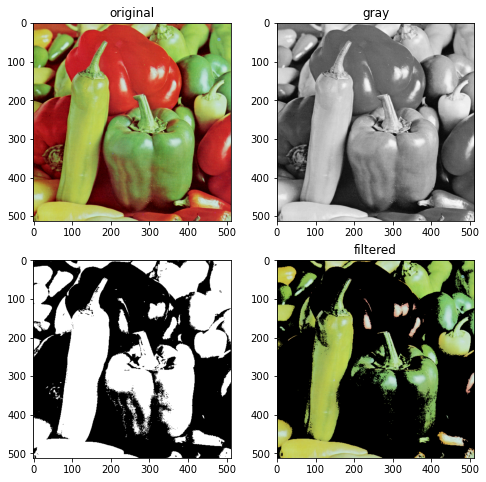

In [83]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].imshow(peppers, cmap='gray')
axs[0, 0].set_title('original')

axs[0, 1].imshow(peppers2gray, cmap='gray')
axs[0, 1].set_title('gray')

axs[1, 0].imshow(mask, cmap='gray')
axs[1, 1].set_title('filtered')

axs[1, 1].imshow(filtered_peppers, cmap='gray')
axs[1, 1].set_title('filtered')


plt.show()

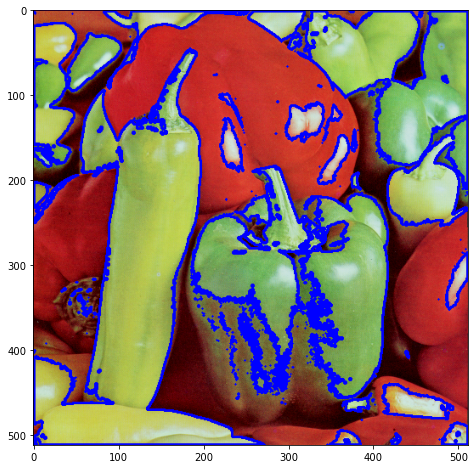

In [86]:
plt.figure(figsize=(16, 8))
plt.imshow(peppers_contours, cmap='gray')
plt.show()

#### Filtering using convolutions

#### How convolutions work 
   
##### Figure 1 

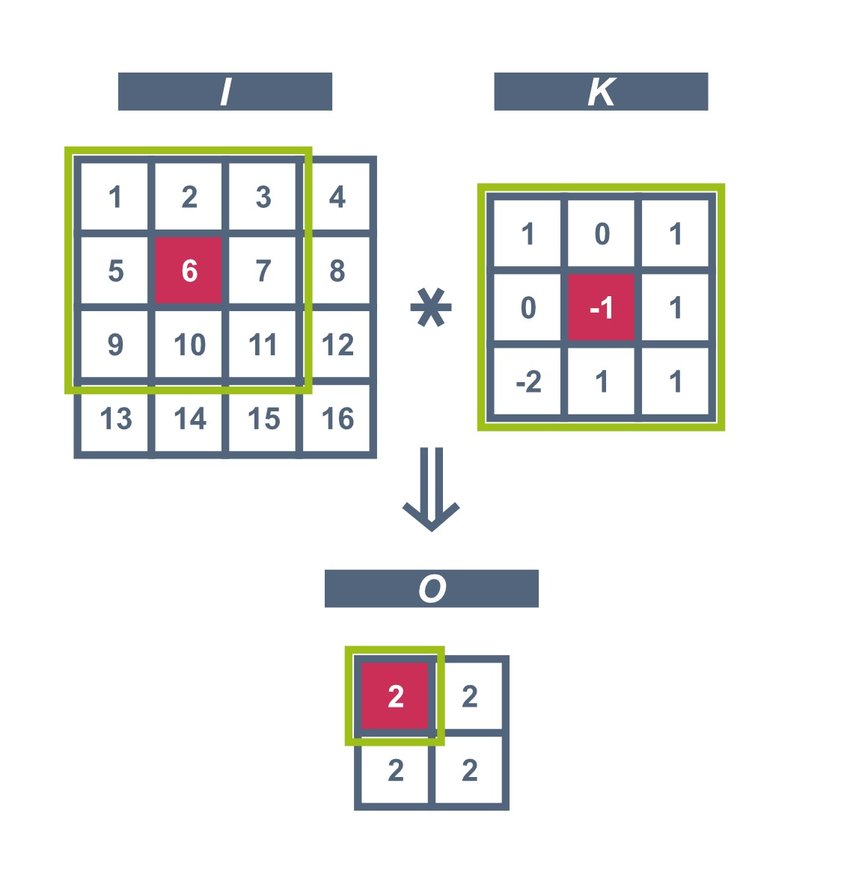

##### Figure 2 

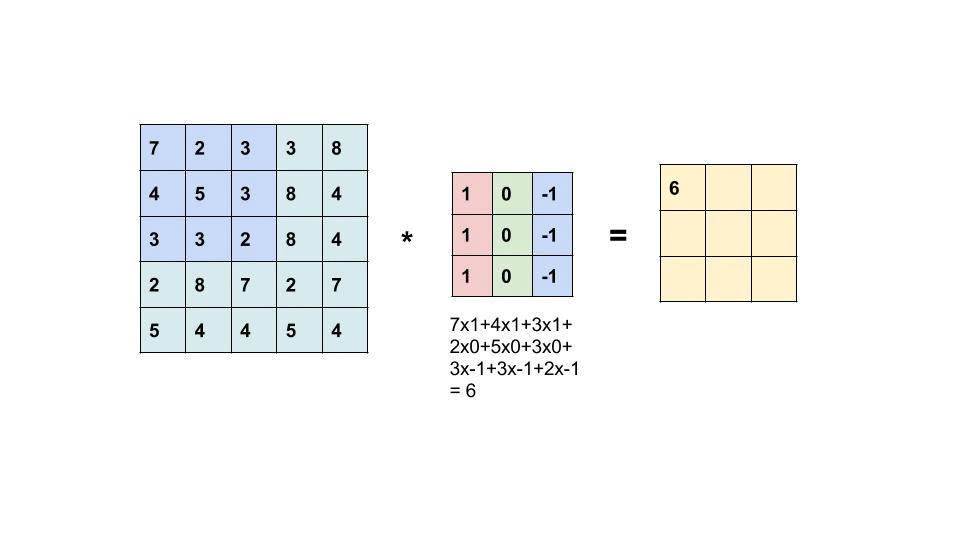

##### Figure 3 

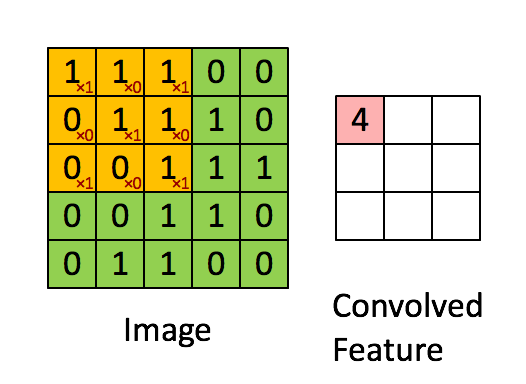

In [87]:
lena = cv.imread(str(IMGS / 'lena.png'))
lena = cv.cvtColor(lena, cv.COLOR_BGR2RGB)

##### Gaussian Filter 

In [89]:
# gaussian filter applies smoothening effect 

blur = cv.GaussianBlur(lena, (15, 15), 0)

Text(0.5, 1.0, 'gaussian filtered')

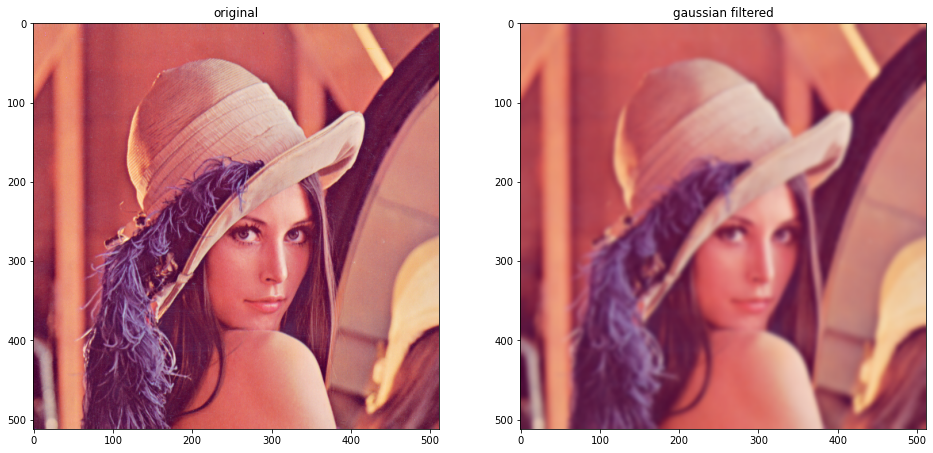

In [92]:
fig, axs = plt.subplots(nrows=1 , ncols=2, figsize=(16, 8))
axs[0].imshow(lena, cmap='gray')
axs[0].set_title('original')
axs[1].imshow(blur, cmap='gray')
axs[1].set_title('gaussian filtered')
plt.show()

#### Derivative Based Kernels(sharpen/edge filters)

##### How convolutions work 

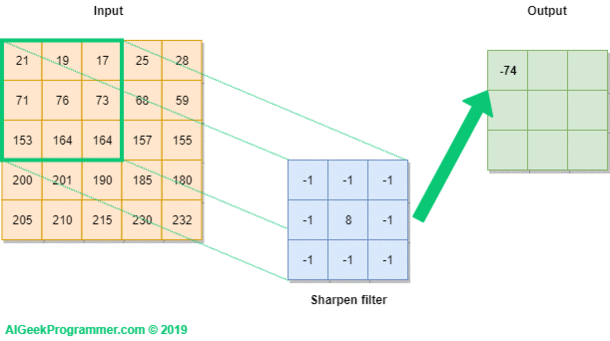

#### Laplace Kernel 

In [99]:
kernel = -1 * np.ones((3, 3), np.float32)

kernel[1, 1] = 8

conv_lena = cv.filter2D(lena, -1, kernel)

In [97]:
#conv_lena = cv.Laplacian(lena, cv.CV_64F)

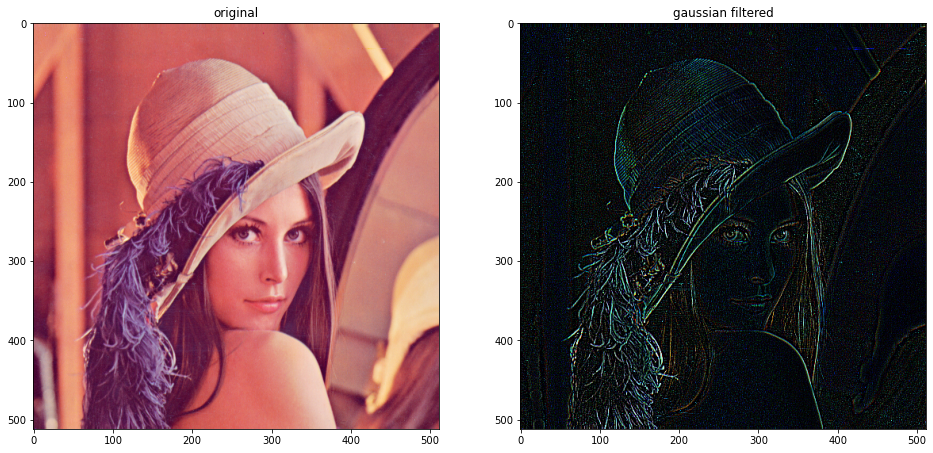

In [100]:
fig, axs = plt.subplots(nrows=1 , ncols=2, figsize=(16, 8))
axs[0].imshow(lena, cmap='gray')
axs[0].set_title('original')
axs[1].imshow(conv_lena, cmap='gray')
axs[1].set_title('gaussian filtered')
plt.show()

#### Sobel Kernels 

In [102]:
sobelx = cv.Sobel(lena, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(lena, cv.CV_64F, 0, 1, ksize=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


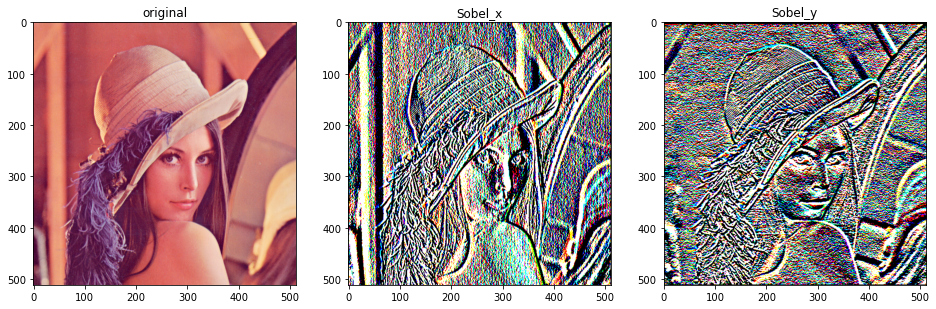

In [104]:
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(16, 8))
axs[0].imshow(lena, cmap='gray')
axs[0].set_title('original')
axs[1].imshow(sobelx, cmap='gray')
axs[1].set_title('Sobel_x')
axs[2].imshow(sobely, cmap='gray')
axs[2].set_title('Sobel_y')
plt.show()